In [1]:
import os
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import math as m
import pandas as pd

In [2]:
def read_prn(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list
    
    splits = [_]*5
    wns_and_temps = [_]*5
    
    for i in range(5):  #find lists of wavenumbers, and each of 4 temperature sets
        splits[i] = lines[i].split()
        wns_and_temps[i] = [float(splits[i][n]) for n in range(len(splits[i]))]
        
    return wns_and_temps

In [3]:
def read_prn_raw(directory, filename):
    df = pd.read_table(os.path.join(directory, filename))
    arr = df.values
    wns = []
    raws = []

    for a in arr:
        wns.append(a[0])
        raws.append(a[1])
    
    return wns, raws

first and last below refer to 2 different files

In [4]:
#wns_and_temps = read_prn('//icnas4.cc.ic.ac.uk/rs5115/downloads', '(2018_09_27_12_05_06_638)_Measurement_progression.prn') # this file doesn't have correpsonding temperature log
wns_and_temps_first = read_prn('/Users/micol/Documents/Imperial/Year4/Master_Project/prn_files', '(2018_09_27_12_40_54_386)_Measurement_progression.prn')
wns_and_temps_last = read_prn('/Users/micol/Documents/Imperial/Year4/Master_Project/prn_files', '(2018_09_27_14_23_05_967)_Measurement_progression.prn')
wns_and_temps_cold = read_prn('/Users/micol/Documents/Imperial/Year4/Master_Project/prn_files','(2018_09_27_14_24_05_672)_Measurement_progression.prn')

In [5]:
wnsh1, rawsh1 = read_prn_raw('/Users/micol/Documents/Imperial/Year4/Master_Project/prn_files', '(2018_09_27_14_23_05)_Measurement1.prn')
wnsh2, rawsh2 = read_prn_raw('/Users/micol/Documents/Imperial/Year4/Master_Project/prn_files', '(2018_09_27_14_23_05)_Measurement2.prn')
wnsh3, rawsh3 = read_prn_raw('/Users/micol/Documents/Imperial/Year4/Master_Project/prn_files', '(2018_09_27_14_23_05)_Measurement3.prn')
wnsh4, rawsh4 = read_prn_raw('/Users/micol/Documents/Imperial/Year4/Master_Project/prn_files', '(2018_09_27_14_23_05)_Measurement4.prn')

wnsc1, rawsc1 = read_prn_raw('/Users/micol/Documents/Imperial/Year4/Master_Project/prn_files', '(2018_09_27_14_24_05)_Measurement1.prn')
wnsc2, rawsc2 = read_prn_raw('/Users/micol/Documents/Imperial/Year4/Master_Project/prn_files', '(2018_09_27_14_24_05)_Measurement2.prn')
wnsc3, rawsc3 = read_prn_raw('/Users/micol/Documents/Imperial/Year4/Master_Project/prn_files', '(2018_09_27_14_24_05)_Measurement3.prn')
wnsc4, rawsc4 = read_prn_raw('/Users/micol/Documents/Imperial/Year4/Master_Project/prn_files', '(2018_09_27_14_24_05)_Measurement4.prn')

In [6]:
def plot_temp_vs_wn(spectrum, lower_wn, upper_wn): #spectrum takes values 1-4
    plt.plot(wns_and_temps_first[0][lower_wn:upper_wn],wns_and_temps_first[spectrum][lower_wn:upper_wn])
    plt.xlabel('wavenumber')
    plt.ylabel('brightness temperature')
    plt.show()

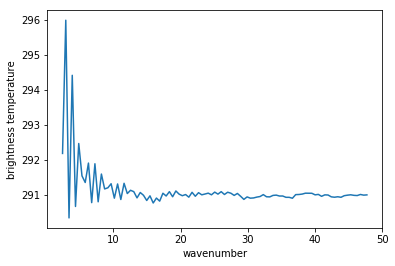

In [7]:
plot_temp_vs_wn(spectrum=1, lower_wn=5, upper_wn=100) 

In [8]:
h = 6.626e-34
c = 299792458
k = 1.381e-23

def planck(wavenumber, T):
    return 2*h*(c**2)*((wavenumber*100)**3)/(np.exp(h*c*(wavenumber*100)/(k*T))-1)

In [9]:
wns_first = np.array(wns_and_temps_first[0][860:4000]) #defining the arrays of wns and temps from results 1
temps_first = np.array(wns_and_temps_first[1][860:4000])
print('first file has avg temp {} C'.format(np.average(temps_first)-273.15))

wns_last = np.array(wns_and_temps_last[0][860:4000]) #defining as above for results 2
temps_last = np.array(wns_and_temps_last[1][860:4000])
print('last file has avg temp {} C'.format(np.average(temps_last)-273.15))

wns_cold = np.array(wns_and_temps_cold[0][860:4000]) #defining as above for results 2
temps_cold = np.array(wns_and_temps_cold[1][860:4000])
print('last file has avg temp {} C'.format(np.average(temps_cold)-273.15))

first file has avg temp 21.763222643312133 C
last file has avg temp 60.865138216560524 C
last file has avg temp 25.20804270700637 C


In [10]:
planckvec = np.vectorize(planck)
rad_first = planckvec(wns_first, temps_first) #radiances of first dataset
rad_last = planckvec(wns_last, temps_last) #radiances of second dataset
rad_cold = planckvec(wns_cold, temps_cold) #radiances of second dataset

In [11]:
def plot_radiances(temps_X, wns_X, rad_X, ylim_low, ylim_high):
    fig = plt.figure() #plot radiance as function of wavenumber
    plt.figure(figsize=(10,8))

    plt.subplot(2,1,1)
    plt.xlabel('wavenumbers')
    plt.ylabel(r'Radiance $W m^{-2} sr^{-1} (cm^{-1})^{-1}$')
    plt.plot(wns_X, [x*100 for x in rad_X])

    plt.subplot(2,1,2)
    plt.xlabel('temperatures')
    plt.ylabel(r'Radiance $W m^{-2} sr^{-1} (cm^{-1})^{-1}$')
    plt.scatter(temps_X,[x*100 for x in rad_X], s=1)
    plt.ylim(ylim_low, ylim_high)

    plt.subplots_adjust(hspace=0.2)
    plt.show()

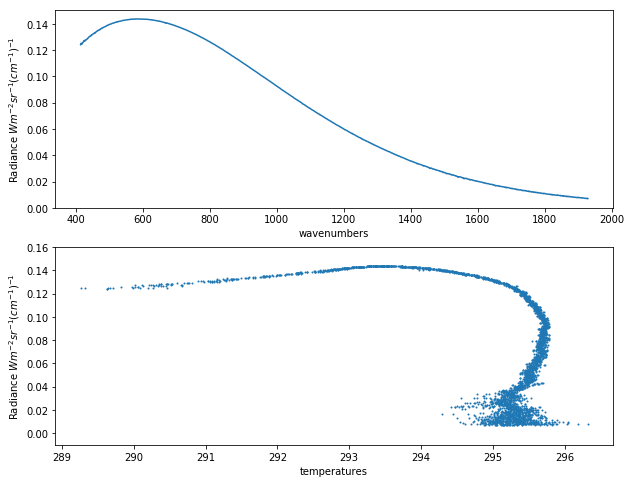

In [12]:
plot_radiances(temps_first, wns_first, rad_first, -0.01,0.16)

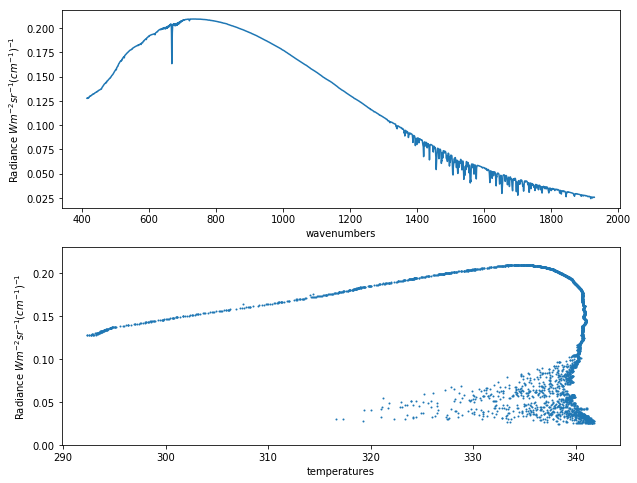

In [13]:
plot_radiances(temps_last, wns_last, rad_last, 0.,0.23)

In [14]:
def plot_planck_X(temps_X, wns_X, rad_X):
    radiances = []
    avg_temp = np.average(temps_X)
    
    for w in wns_X:
        radiances.append(planck(w, avg_temp))
    
    plt.figure(figsize=(10,5))    
    plt.plot(wns_X, [x*100 for x in radiances])
    plt.plot(wns_X, [x*100 for x in rad_X])
    plt.xlabel(r'Wavenumber $cm^{-1}$')
    plt.ylabel(r'Radiance $W m^{-2} sr^{-1} (cm^{-1})^{-1}$')
    plt.legend(['theoretical radiance', 'experimental radiance'])
    plt.show()

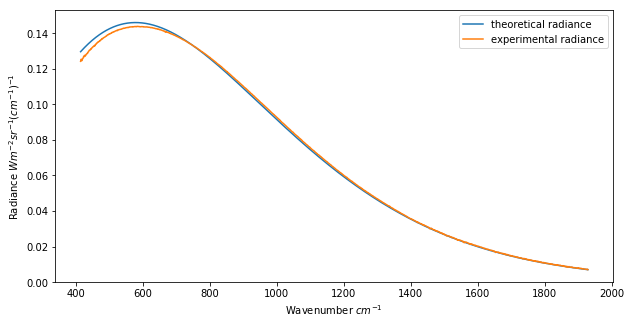

In [15]:
plot_planck_X(temps_first, wns_first, rad_first)

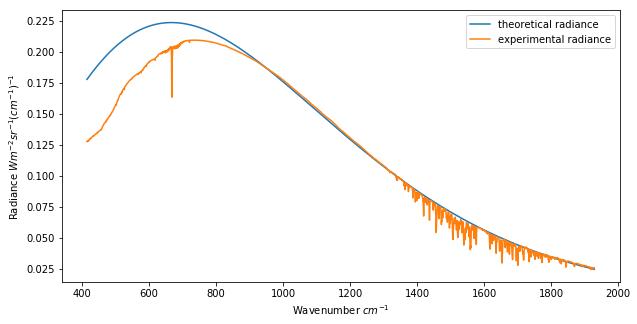

In [40]:
plot_planck_X(340, wns_last, rad_last)

In [17]:
def transmission_fn(temp, rad_X, wns_X):
    real_radiances = rad_X
    theory_radiances = []

    for w in wns_X:
        theory_radiances.append(planck(w,temp))
    
    def division(real_val,theory_val):
        return real_val/theory_val
    
    division_vec = np.vectorize(division)
    
    ratio = division_vec(real_radiances, theory_radiances)
    plt.figure(figsize=(8,5))    
    plt.plot(wns_X, ratio)
    plt.xlabel('wavenumber')
    plt.ylabel('transmission')
    plt.show()

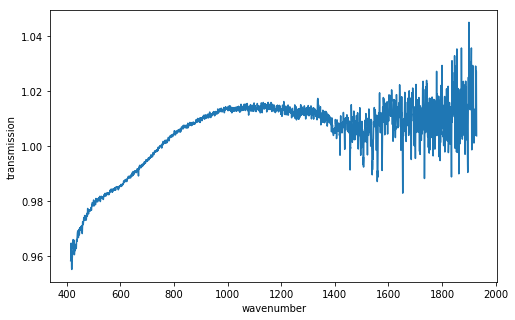

In [18]:
transmission_fn(np.average(temps_first), rad_first, wns_first)

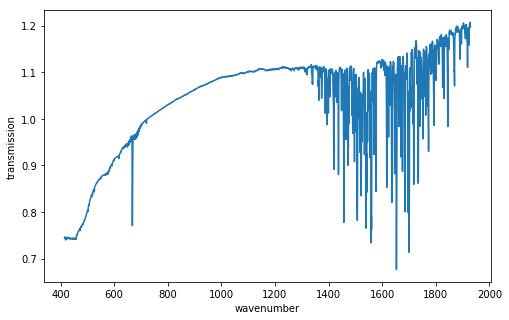

In [19]:
transmission_fn(np.average(temps_last), rad_last, wns_last)

In [20]:
def plot_raw(title, wn, raw):
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.plot(wn, raw)
    plt.xlabel(r'Wavenumber $cm^{-1}$')
    plt.ylabel('Raw data') 
    plt.show()

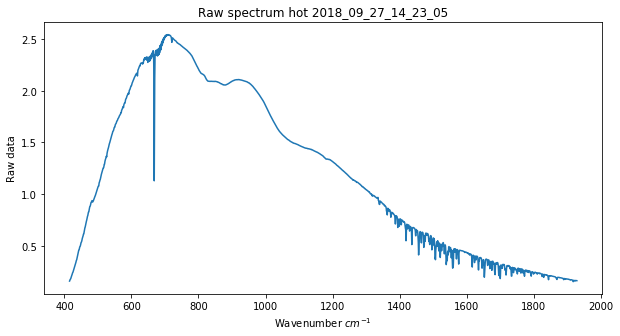

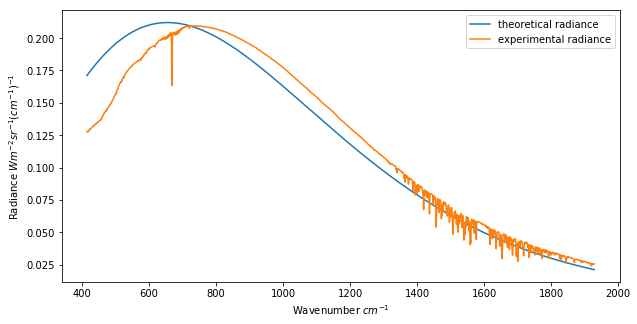

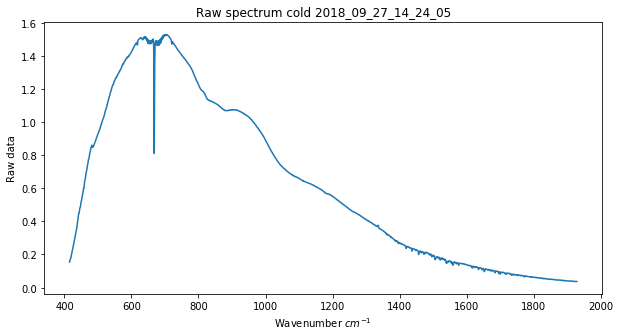

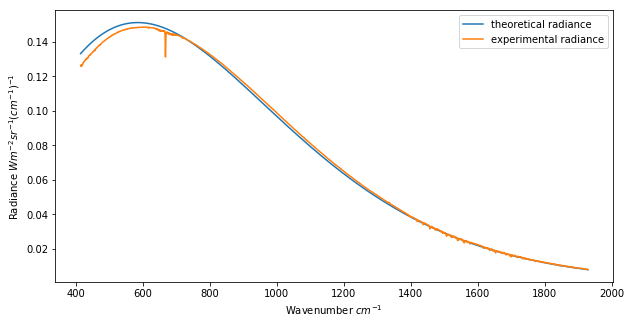

In [21]:
plot_raw('Raw spectrum hot 2018_09_27_14_23_05', wnsh1[860:4000],rawsh1[860:4000])
plot_planck_X(temps_last, wns_last, rad_last)
plot_raw('Raw spectrum cold 2018_09_27_14_24_05', wnsc1[860:4000],rawsc1[860:4000])
plot_planck_X(temps_cold, wns_cold, rad_cold)

In [23]:
zip1 = zip(wnsc1[860:4000], wns_last)
for (a,b) in zip1:
    print(a,b)

415.249 414.7666
415.731 415.2489
416.213 415.7312
416.696 416.2135
417.178 416.6958
417.66 417.1781
418.143 417.6604
418.625 418.1426
419.107 418.6249
419.589 419.1072
420.072 419.5895
420.554 420.0718
421.036 420.5541
421.519 421.0364
422.001 421.5186
422.483 422.0009
422.966 422.4832
423.448 422.9655
423.93 423.4478
424.412 423.9301
424.895 424.4124
425.377 424.8947
425.859 425.3769
426.342 425.8592
426.824 426.3415
427.306 426.8238
427.788 427.3061
428.271 427.7884
428.753 428.2707
429.235 428.7529
429.718 429.2352
430.2 429.7175
430.682 430.1998
431.164 430.6821
431.647 431.1644
432.129 431.6467
432.611 432.129
433.094 432.6112
433.576 433.0935
434.058 433.5758
434.54 434.0581
435.023 434.5404
435.505 435.0227
435.987 435.505
436.47 435.9872
436.952 436.4695
437.434 436.9518
437.916 437.4341
438.399 437.9164
438.881 438.3987
439.363 438.881
439.846 439.3633
440.328 439.8455
440.81 440.3278
441.292 440.8101
441.775 441.2924
442.257 441.7747
442.739 442.257
443.222 442.7393
443.704 

871.492 871.0099
871.974 871.4922
872.457 871.9745
872.939 872.4568
873.421 872.9391
873.904 873.4214
874.386 873.9036
874.868 874.3859
875.351 874.8682
875.833 875.3505
876.315 875.8328
876.797 876.3151
877.28 876.7974
877.762 877.2797
878.244 877.7619
878.727 878.2442
879.209 878.7265
879.691 879.2088
880.173 879.6911
880.656 880.1734
881.138 880.6557
881.62 881.1379
882.103 881.6202
882.585 882.1025
883.067 882.5848
883.549 883.0671
884.032 883.5494
884.514 884.0317
884.996 884.514
885.479 884.9962
885.961 885.4785
886.443 885.9608
886.925 886.4431
887.408 886.9254
887.89 887.4077
888.372 887.89
888.855 888.3723
889.337 888.8545
889.819 889.3368
890.301 889.8191
890.784 890.3014
891.266 890.7837
891.748 891.266
892.231 891.7483
892.713 892.2305
893.195 892.7128
893.677 893.1951
894.16 893.6774
894.642 894.1597
895.124 894.642
895.607 895.1243
896.089 895.6066
896.571 896.0888
897.053 896.5711
897.536 897.0534
898.018 897.5357
898.5 898.018
898.983 898.5003
899.465 898.9826
899.947 8

1138.197 1137.7145
1138.679 1138.1968
1139.161 1138.6791
1139.644 1139.1614
1140.126 1139.6437
1140.608 1140.1259
1141.091 1140.6082
1141.573 1141.0905
1142.055 1141.5728
1142.537 1142.0551
1143.02 1142.5374
1143.502 1143.0197
1143.984 1143.502
1144.467 1143.9842
1144.949 1144.4665
1145.431 1144.9488
1145.913 1145.4311
1146.396 1145.9134
1146.878 1146.3957
1147.36 1146.878
1147.843 1147.3603
1148.325 1147.8425
1148.807 1148.3248
1149.289 1148.8071
1149.772 1149.2894
1150.254 1149.7717
1150.736 1150.254
1151.219 1150.7363
1151.701 1151.2185
1152.183 1151.7008
1152.665 1152.1831
1153.148 1152.6654
1153.63 1153.1477
1154.112 1153.63
1154.595 1154.1123
1155.077 1154.5946
1155.559 1155.0768
1156.041 1155.5591
1156.524 1156.0414
1157.006 1156.5237
1157.488 1157.006
1157.971 1157.4883
1158.453 1157.9706
1158.935 1158.4528
1159.417 1158.9351
1159.9 1159.4174
1160.382 1159.8997
1160.864 1160.382
1161.347 1160.8643
1161.829 1161.3466
1162.311 1161.8289
1162.793 1162.3111
1163.276 1162.7934
1163.

1391.397 1390.9151
1391.88 1391.3974
1392.362 1391.8796
1392.844 1392.3619
1393.327 1392.8442
1393.809 1393.3265
1394.291 1393.8088
1394.773 1394.2911
1395.256 1394.7734
1395.738 1395.2557
1396.22 1395.7379
1396.703 1396.2202
1397.185 1396.7025
1397.667 1397.1848
1398.149 1397.6671
1398.632 1398.1494
1399.114 1398.6317
1399.596 1399.114
1400.079 1399.5962
1400.561 1400.0785
1401.043 1400.5608
1401.525 1401.0431
1402.008 1401.5254
1402.49 1402.0077
1402.972 1402.49
1403.455 1402.9722
1403.937 1403.4545
1404.419 1403.9368
1404.901 1404.4191
1405.384 1404.9014
1405.866 1405.3837
1406.348 1405.866
1406.831 1406.3483
1407.313 1406.8305
1407.795 1407.3128
1408.277 1407.7951
1408.76 1408.2774
1409.242 1408.7597
1409.724 1409.242
1410.207 1409.7243
1410.689 1410.2065
1411.171 1410.6888
1411.653 1411.1711
1412.136 1411.6534
1412.618 1412.1357
1413.1 1412.618
1413.583 1413.1003
1414.065 1413.5826
1414.547 1414.0648
1415.029 1414.5471
1415.512 1415.0294
1415.994 1415.5117
1416.476 1415.994
1416.9

1614.696 1614.2139
1615.178 1614.6961
1615.661 1615.1784
1616.143 1615.6607
1616.625 1616.143
1617.108 1616.6253
1617.59 1617.1076
1618.072 1617.5899
1618.554 1618.0721
1619.037 1618.5544
1619.519 1619.0367
1620.001 1619.519
1620.484 1620.0013
1620.966 1620.4836
1621.448 1620.9659
1621.93 1621.4482
1622.413 1621.9304
1622.895 1622.4127
1623.377 1622.895
1623.86 1623.3773
1624.342 1623.8596
1624.824 1624.3419
1625.306 1624.8242
1625.789 1625.3065
1626.271 1625.7887
1626.753 1626.271
1627.236 1626.7533
1627.718 1627.2356
1628.2 1627.7179
1628.682 1628.2002
1629.165 1628.6825
1629.647 1629.1647
1630.129 1629.647
1630.612 1630.1293
1631.094 1630.6116
1631.576 1631.0939
1632.058 1631.5762
1632.541 1632.0585
1633.023 1632.5408
1633.505 1633.023
1633.988 1633.5053
1634.47 1633.9876
1634.952 1634.4699
1635.434 1634.9522
1635.917 1635.4345
1636.399 1635.9168
1636.881 1636.399
1637.364 1636.8813
1637.846 1637.3636
1638.328 1637.8459
1638.81 1638.3282
1639.293 1638.8105
1639.775 1639.2928
1640.25

1866.45 1865.9676
1866.932 1866.4498
1867.414 1866.9321
1867.897 1867.4144
1868.379 1867.8967
1868.861 1868.379
1869.344 1868.8613
1869.826 1869.3436
1870.308 1869.8258
1870.79 1870.3081
1871.273 1870.7904
1871.755 1871.2727
1872.237 1871.755
1872.72 1872.2373
1873.202 1872.7196
1873.684 1873.2019
1874.166 1873.6841
1874.649 1874.1664
1875.131 1874.6487
1875.613 1875.131
1876.096 1875.6133
1876.578 1876.0956
1877.06 1876.5779
1877.542 1877.0602
1878.025 1877.5424
1878.507 1878.0247
1878.989 1878.507
1879.472 1878.9893
1879.954 1879.4716
1880.436 1879.9539
1880.918 1880.4362
1881.401 1880.9184
1881.883 1881.4007
1882.365 1881.883
1882.848 1882.3653
1883.33 1882.8476
1883.812 1883.3299
1884.294 1883.8122
1884.777 1884.2945
1885.259 1884.7767
1885.741 1885.259
1886.224 1885.7413
1886.706 1886.2236
1887.188 1886.7059
1887.67 1887.1882
1888.153 1887.6705
1888.635 1888.1527
1889.117 1888.635
1889.6 1889.1173
1890.082 1889.5996
1890.564 1890.0819
1891.046 1890.5642
1891.529 1891.0465
1892.011

In [24]:
# So the wavenumbers roughly match up :)

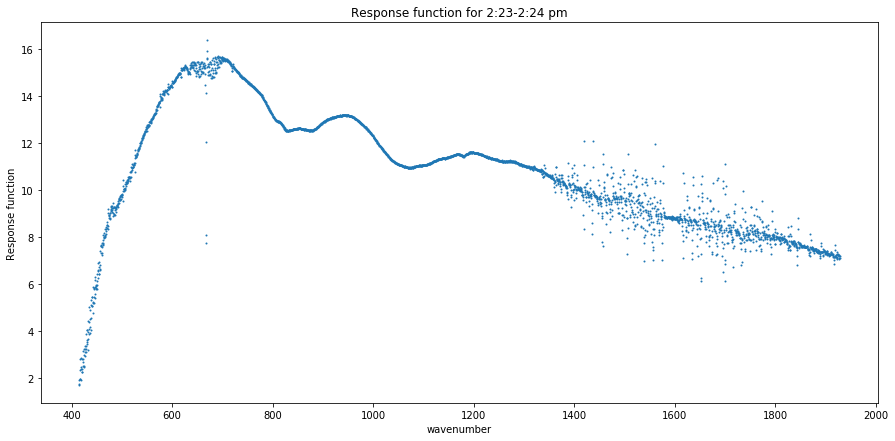

In [38]:
def response_function(vh,vc,lh,lc):
    I = (vh-vc)/(lh-lc)
    return I

resp_func = np.vectorize(response_function)
Is = resp_func(rawsh1[860:4000], rawsc1[860:4000], [x*100 for x in rad_last], [x*100 for x in rad_cold])

plt.figure(figsize=(15,7))
plt.scatter(wns_last, Is, s=1)
plt.ylabel('Response function')
plt.xlabel('wavenumber')
plt.title('Response function for 2:23-2:24 pm')
plt.show()